<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/Ex_BinaryResponseIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Response IV Model

Consider a binary outcome $Y$ (e.g., female labor force participation) generated according to

\begin{align}
Y = 1\{\mu(D,W)\ge U\}.
\end{align}

$D$ is a binary treatment, which may be related to the unobserved determinant $U$ of the outcome. $W$ is a vector of control variables. The model does not specify how $D$ is generated. This is a _single equation IV model_.
We, therefore, allow all values of outcome and treatment status that satisfy the structural relationship. We assume instrumental variables $Z$ satisfying $U\perp Z|W$ is available. We let $X=(Z',W')'.$


Formally, the model prediction is
\begin{align}
G(u|x;\theta)=\big\{(y,d):y = 1\{\mu(d,w)\ge u\}\big\}.
\end{align}

## Model prediction

Consider the case $(y,d)=(1,1)$. This outcome occurs when $\mu(1,w)\ge u$. Similarly, $(y,d)=(1,0)$ occurs when $\mu(0,w)\ge u$, $(y,d)=(0,1)$ occurs when $\mu(1,w)< u$, and $(y,d)=(0,0)$ occurs $\mu(0,w)< u$.

Suppose $\mu(1,w)<\mu(0,w)$. Then, $G$ can be summarized as follows
\begin{align}
G(u|x;\theta)=\begin{cases}
\{(0,0),(0,1)\} & \text{ if } u > \mu(0,w)\\
\{(0,1),(1,0)\} & \text{ if } \mu(1,w)< u \le \mu(0,w)\\
\{(1,0),(1,1)\} & \text{ if } u\le \mu(1,w)
\end{cases}
\end{align}

This prediction is visualized below.

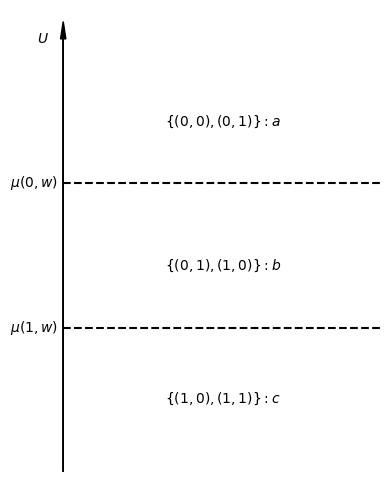

In [1]:
import matplotlib.pyplot as plt

# Set the scale for the figure
scale = 0.8
fig, ax = plt.subplots(figsize=(6 * scale, 7.5* scale))

# Draw the y-axis
ax.arrow(0, 0, 0, 7.5, head_width=0.1, head_length=0.3, fc='black', ec='black')
ax.text(-0.5, 7.5, r'$U$', va='center')

# Draw the dashed lines
dashed_lines_y = [2.5,5]
for y in dashed_lines_y:
    ax.plot([0, 6], [y, y], 'k--')

# Add text labels
ax.text(3, 1.2, r'$\{(1,0),(1,1)\} : c$', ha='center')
ax.text(3, 3.5, r'$\{(0,1),(1,0)\} : b$', ha='center')
ax.text(3, 6, r'$\{(0,0),(0,1)\} : a$', ha='center')

# Add the specific text annotations next to the dashed lines
ax.text(-0.1, 5, r'$\mu(0,w)$', va='center', ha='right')
ax.text(-0.1, 2.5, r'$\mu(1,w)$', va='center', ha='right')

# Adjust the plot limits and remove the x-axis
ax.set_xlim(-1, 6)
ax.set_ylim(0, 8)
ax.axis('off')

plt.show()


In [2]:
!git clone https://github.com/hkaido0718/IncompleteDiscreteChoice.git

fatal: destination path 'IncompleteDiscreteChoice' already exists and is not an empty directory.


We now convert the prediction into a graph.

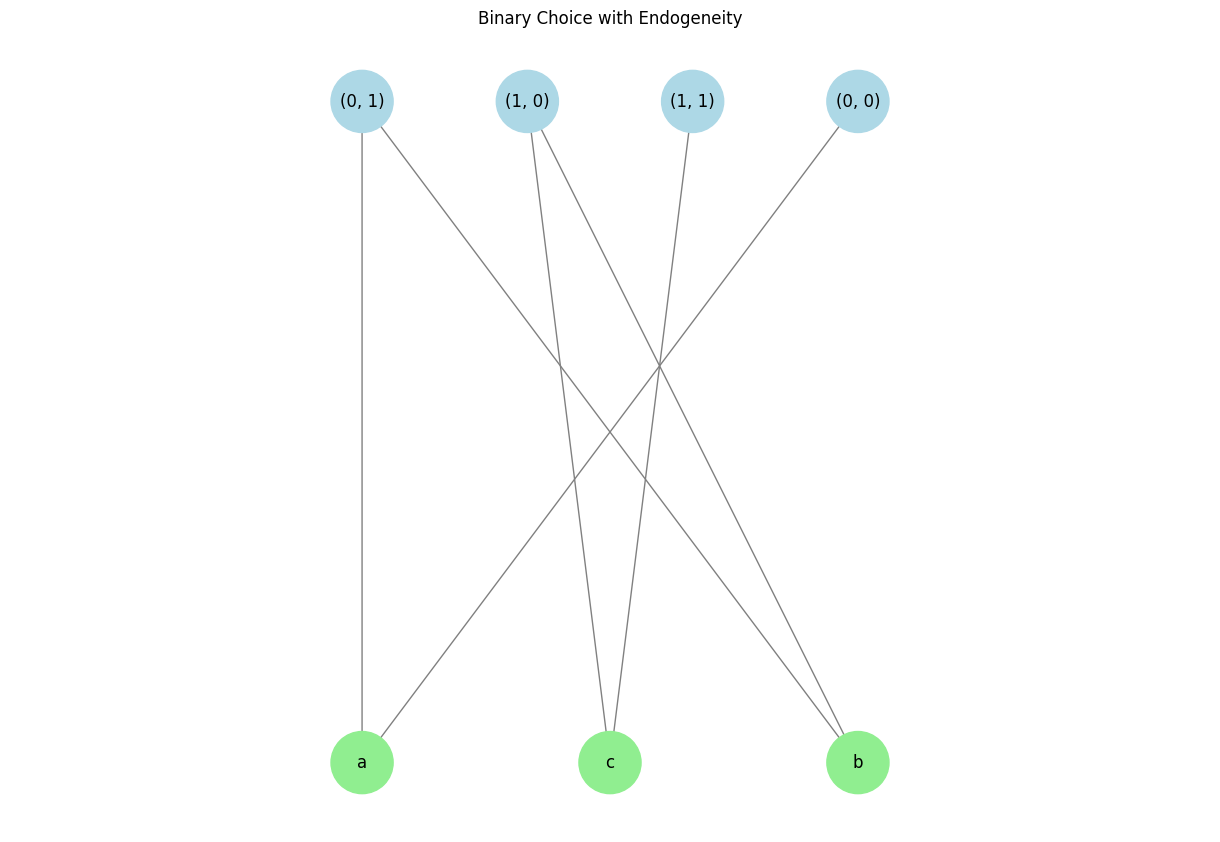

In [3]:
import idclib_undi as idc

# Define the Y-nodes and U-nodes
Y_nodes = [(0,0),(0,1),(1,0),(1,1)]
U_nodes = ['a', 'b', 'c']

# Add edges between nodes
edges = [
    ('a', (0,1)),
    ('a', (0,0)),
    ('b', (1,0)),
    ('b', (0,1)),
    ('c', (1,1)),
    ('c', (1,0))
]

# idc library has a class BipartiteGraph to store your model
gmodel = idc.BipartiteGraph(Y_nodes, U_nodes, edges)

# Plot the graph using the new method
gmodel.plot_graph(title='Binary Choice with Endogeneity')

We may derive the sharp idetifying restrictions.

Recall that we normalized the distribution of $U|W$ to $U[0,1]$. Hence,
\begin{align}
F_\theta(U\in a|w,z)&=1-\mu(0,w)\\
F_\theta(U\in b|w,z)&=\mu(0,w)-\mu(1,w)\\
F_\theta(U\in c|w,z)&=\mu(1,w).
\end{align}

We can check how these structural objects are related to the distribution of the observable endogenous variables $(Y,D)$.

For example, let's hypothesize that $\mu(0,w)=0.7$ and $\mu(1,w)=0.3$. The average treatment effect of switching from $d=1$  to $d=0$ (at $w$) is $\mu(0,w)-\mu(1,w)=0.4$. One can check if these values are compatible with data by checking the sharp identifying restrictions.

In [4]:
import numpy as np

# Define probabilities for the U-nodes
Ftheta = np.array([0.3, 0.4, 0.3])  # Example probabilities corresponding to U_nodes

# Use the calculate_sharp_lower_bound to calculate probabilities.
results,sharp_lower_bounds = gmodel.calculate_sharp_lower_bound(Ftheta)
idc.print_table(results)

Subset of Y-nodes                    Exclusive U-nodes   Sharp Lower Bound  
{(0, 1), (0, 0)}                     {'a'}               0.300              
{(0, 1), (1, 0)}                     {'b'}               0.400              
{(1, 0), (1, 1)}                     {'c'}               0.300              
{(0, 1), (1, 0), (0, 0)}             {'a', 'b'}          0.700              
{(0, 1), (1, 1), (0, 0)}             {'a'}               0.300              
{(1, 0), (1, 1), (0, 0)}             {'c'}               0.300              
{(0, 1), (1, 0), (1, 1)}             {'b', 'c'}          0.700              
{(0, 1), (1, 0), (1, 1), (0, 0)}     {'a', 'c', 'b'}     1.000              


The second row suggests $\mu(0,w)-\mu(1,w)$ is bounded from above by $P(Y=(0,1) \text{ or }(1,0)|w,z)$, which can be calculated from data. Since the ATE does not depend on $z$, a simple upper bound on this object can be obtained by using the 2nd row of the table above across different values of $z$:
\begin{align}
\inf_z P(Y=(0,1) \text{ or }(1,0)|w,z)\ge \mu(0,w)-\mu(1,w).
\end{align}

In general, one can use all sharp identifying restrictions to make inference about functions of $\mu$ (see other notes).

## References
- Chesher, A. and Rosen, A. (2013) "What do instrumental variable models deliver with discrete dependent variables?"  *American Economic Review, Papers and Proceedings*.
  